<div align="center">
    <h1>Φ-253 Introduction to Data Science and Machine Learning II</h1> 
    <p style="font-size:16px;line-height:28px;text-align:center">
        <b>Department of Physics, University of Crete</b>
        <br>
        <b>Spring Semester 2020-2021</b>
        <br>
        <b>Instructor:</b> Georgios D. Barmparis
    </p>
</div>
    
<hr style='height:2px'>

<div>
    <p><b>Welcome to "Introduction to Data Science and Machine Learning II".</b></p>
</div>
<br>
<div align="justify">
<p>
The course focuses on hands-on applications of machine learning methods using data from the field of physics. Basic mathematical concepts will be presented and correlations with concepts and methods of statistical physics will be highlighted. At the same time, students will be trained in modern computing tools and programming languages <i>(Google Colab, Python, Jupyter-Notebooks, modern ML computing packages)</i>.
</p>    
</div>
    
<hr style='height:2px'>

## Lecture - Lab 3: ***CNNs, Pre-trained Models and Transfer Learning***

### This notebook must be submitted by <span style="font-size:24px;color:red;text-decoration:underline">Monday, March 1, 2021</span>.

### Student Name:

*Enter your name here.*

<hr style='height:2px'>

##Part A, *Discussion and Examples.*

## Pre-trained Models.

Pre-trained models are models trained in large databases and can solve problems similar to those they trained on. We can use them as they come or adapt them to our situation.

## Transfer Learning.
Transfer learning is a method where a network will not have to learn from scratch all the input data features, but it will use knowledge from another network to solve a new similar task.

## Source:

[Keras Pretrained Models](https://keras.io/applications/)

[Using Pretrained Models](https://towardsdatascience.com/step-by-step-guide-to-using-pretrained-models-in-keras-c9097b647b29)

[Transfer Learning](https://machinelearningmastery.com/how-to-improve-performance-with-transfer-learning-for-deep-learning-neural-networks/)

## Before we start ....

###Specify the version of TensorFlow in Colab or assure that any Tensorflow vesrion $\ge$ 2.0 is installed.

In [1]:
try :
  # In Google Colab
  %tensorflow_version 2.x
except :
  pass

# Import Tensorflow
import tensorflow as tf

# Assure TensorFlow version >= 2 is installed. Otherwise install TensorFlow 2.0 version.
try :
  assert tf.__version__ >= "2.0"
  print ("TensorFlow version found:", tf.__version__)
except :
  !pip install tensorflow==2.4

# Import NumPy and Matplotlib.
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18}) # Set the font size of the labels in the plot.

TensorFlow version found: 2.8.0


### Using a Pretrained Model.

The [VGG16](https://arxiv.org/pdf/1409.1556.pdf) model.

In [ ]:
# Import the VGG16 model and the preprocess_input function.
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

# Load VGG16 with weights pre-trained on ImageNet database.
model1 = VGG16(weights = "imagenet")

# Print the structure of the model.
model1.summary()

553476096/553467096 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

## Another way to visualize the model.


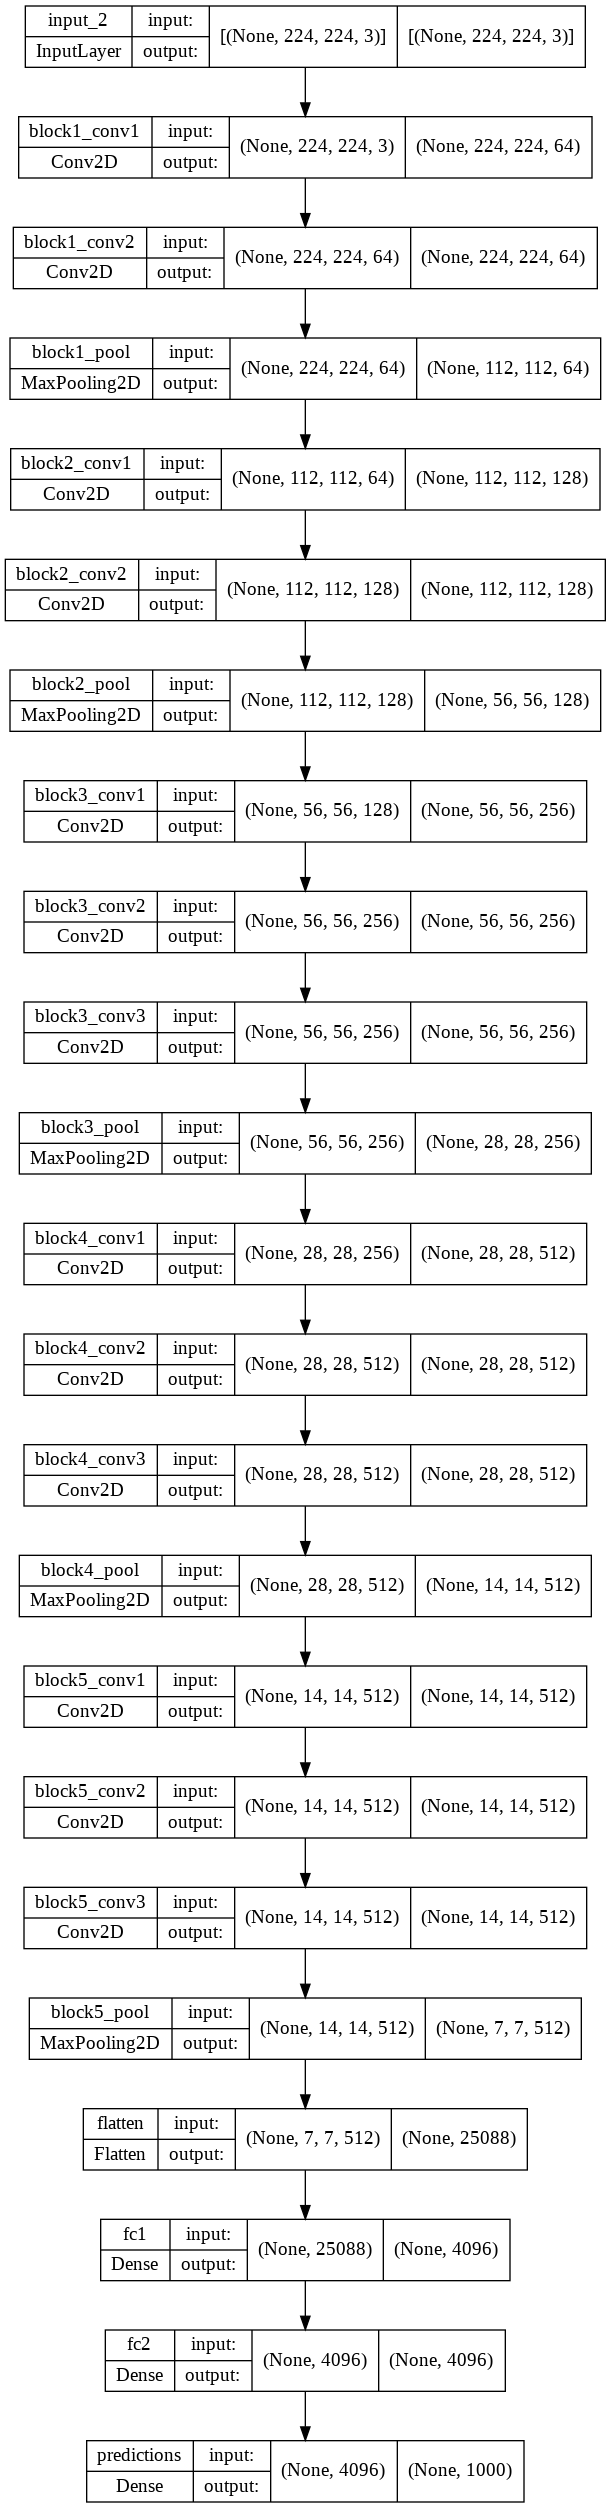

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model1, show_shapes = True )

## Prepare the Input Image.

In [ ]:
# Load the needed packages.
import requests # URL requests. Load images from the internet.

from PIL import Image # Python Image Library
from io import BytesIO # Convert to bytes.

from tensorflow.keras.preprocessing import image

def prepare_image(url, size = (224, 224)) :
  #
  # Request input from a url.
  response = requests.get(url)
  # Convert it to an object of the class Image.
  img = Image.open(BytesIO(response.content))
  #
  # Visualize the image.
  plt.title("Original image")
  plt.imshow(img)
  plt.show()
  #
  # Convert it to a NumPy array.
  img = np.array(img.resize(size))
  img_array = image.img_to_array(img)
  # Expand the dimensions of the image.
  img_array_expanded_dims = np.expand_dims(img_array, axis = 0)
  # Return a preprocessed input as required by the VGG16 model.
  return preprocess_input(img_array_expanded_dims)

## Load an image from a URL and classify it using VGG16.

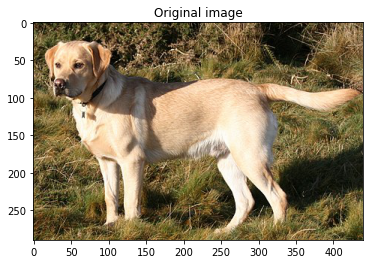

49152/35363 [=========================================] - 0s 0us/step


[[('n02091831', 'Saluki', 0.2675543),
  ('n02099712', 'Labrador_retriever', 0.22610144),
  ('n02109047', 'Great_Dane', 0.11515008),
  ('n02091134', 'whippet', 0.09950736),
  ('n02087394', 'Rhodesian_ridgeback', 0.045520436)]]

In [ ]:
# Set the image source.

# Image 1
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/3/34/Labrador_on_Quantock_%282175262184%29.jpg/440px-Labrador_on_Quantock_%282175262184%29.jpg"

# Image 2
#url = "https://f1.media.brightcove.com/8/1078702682/1078702682_6004950245001_6004956161001-vs.jpg?pubId=1078702682&videoId=6004956161001"

# Image 3
#url = "https://upload.wikimedia.org/wikipedia/commons/4/48/Bulbul_2.JPG"

# Image 4
#url = "https://upload.wikimedia.org/wikipedia/commons/1/1d/Avocado.jpeg"

# Preprocess image for VGG16
preprocessed_image = prepare_image(url)

# Use model1 (VGG16) to classify the image
predictions = model1.predict(preprocessed_image)

# Decode and print the predicted results.
from tensorflow.keras.applications import imagenet_utils
results = imagenet_utils.decode_predictions(predictions)

# Print the results.
results

## Transfer Learning

We will train a model with the CIFAR10 dataset and then use it as the base model to transfer knowledge to a model that classifies the CIFAR100 dataset.

### Train a model to classify the [CIFAR100](https://keras.io/datasets/) dataset images from scratch, to use it as the benchmark model.

In [ ]:
# Load the dataset.
from tensorflow.keras.datasets import cifar100

# Load the dataset.
(train_images100, train_labels100), (test_images100, test_labels100) = cifar100.load_data()

# The dataset contains 50000 images of 32 by 32 pixels of 3 channels.
# 60000 of them are used as train images.
train_images100 = train_images100.reshape((50000, 32, 32, 3))
train_images100 = train_images100.astype('float32') / 255

# 10000 of them are used as test images.
test_images100 = test_images100.reshape((10000, 32, 32, 3))
test_images100 = test_images100.astype('float32') / 255

from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot vector.
train_labels100 = to_categorical(train_labels100)
test_labels100  = to_categorical(test_labels100)

169009152/169001437 [==============================] - 6s 0us/step


## Create a model and train it with the CIFAR100 dataset from scratch.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model2 = Sequential()
model2.add(Conv2D( 16, kernel_size = (3, 3), strides = (1, 1), activation = 'relu', input_shape = (32, 32, 3), padding = "same"))
model2.add(MaxPooling2D(pool_size = (2, 2), strides = (1, 1), padding = 'valid'))
model2.add(Conv2D( 32, kernel_size = (3, 3), strides = (1, 1), activation = 'relu', padding = 'valid'))
model2.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
model2.add(Conv2D( 64, kernel_size = (3, 3), strides = (1, 1), activation = 'relu', padding = 'valid'))
model2.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
model2.add(Conv2D( 64, kernel_size = (3, 3), strides = (1, 1), activation = 'relu', padding = 'valid'))
model2.add(Flatten())
model2.add(Dense(500, activation = 'relu'))
model2.add(Dense(250, activation = 'relu'))
model2.add(Dense(100, activation = 'softmax'))

model2.summary()

model2.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

history2 = model2.fit(train_images100, train_labels100,
                    validation_data = (test_images100, test_labels100),
                    epochs = 10, batch_size = 32)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 64)         

NameError: ignored

## Let's now use the CIFAR10 dataset to train a model again from scratch. We want to use this model as the pre-trained model.

In [ ]:
# Load the CIFAR10 dataset.
from tensorflow.keras.datasets import cifar10

# Load the dataset.
(train_images10, train_labels10), (test_images10, test_labels10) = cifar10.load_data()

# The dataset contains 50000 images of 32 by 32 pixels of 3 channels.
# 60000 of them are used as train images.
train_images10 = train_images10.reshape((50000, 32, 32, 3))
train_images10 = train_images10.astype('float32') / 255

# 10000 of them are used as test images.
test_images10 = test_images10.reshape((10000, 32, 32, 3))
test_images10 = test_images10.astype('float32') / 255

from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot vector.
train_labels10 = to_categorical(train_labels10)
test_labels10  = to_categorical(test_labels10)

170500096/170498071 [==============================] - 6s 0us/step


## Create and traind the new model.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense

model3 = Sequential()
model3.add(Conv2D( 16, kernel_size = (3, 3), strides = (1, 1), activation = 'relu', input_shape = (32, 32, 3), padding = "same"))
model3.add(MaxPooling2D(pool_size = (2, 2), strides = (1, 1), padding = 'valid'))
model3.add(Conv2D( 32, kernel_size = (3, 3), strides = (1, 1), activation = 'relu', padding = 'valid'))
model3.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
model3.add(Conv2D( 64, kernel_size = (3, 3), strides = (1, 1), activation = 'relu', padding = 'valid'))
model3.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
model3.add(Conv2D( 64, kernel_size = (3, 3), strides = (1, 1), activation = 'relu', padding = 'valid'))
model3.add(Flatten())
model3.add(Dense(500, activation = 'relu'))
model3.add(Dense(250, activation = 'relu'))
model3.add(Dense(10, activation = 'softmax'))

model3.summary()

model3.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

history3 = model3.fit(train_images10, train_labels10,
                    validation_data = (test_images10, test_labels10),
                    epochs = 6, batch_size = 32)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 64)         

## Create a model that uses the features extracted from the CIFAR10 dataset and classifies the CIFAR100 dataset.

In [ ]:
# Create a Sequential model.
model4 = Sequential()

# Load the extracted features from model3 (remove the classification layers).
for layer in model3.layers[:-3]:
  layer.trainable = False # DO NOT train these layers.
  model4.add(layer)

# Initialize to random weights the classification layers and train them.
model4.add(Dense(500, activation = 'relu'))
model4.add(Dense(250, activation = 'relu'))
model4.add(Dense(100, activation = 'softmax'))

# Print the model.
model4.summary()

# Compile the model.
model4.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# Fit the model.
history4 = model4.fit(train_images100, train_labels100, 
                    validation_data = (test_images100, test_labels100),
                    epochs = 10, batch_size = 32)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 64)         

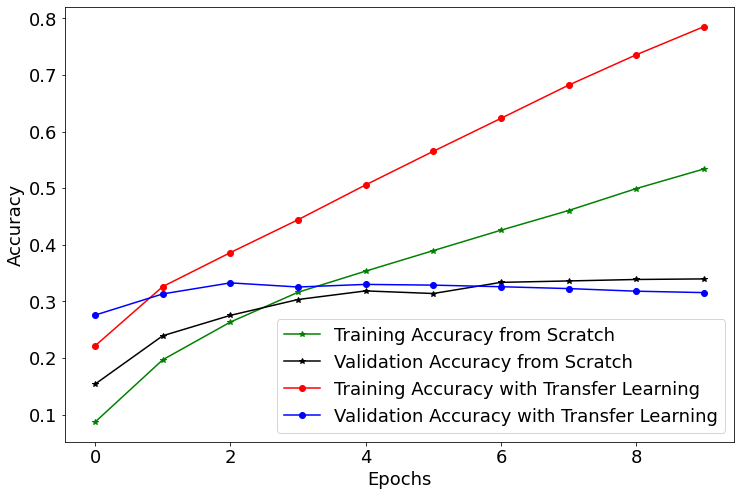

In [ ]:
# Import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure( figsize = (12,8) )

pd

## Part B : *Hands-On Activity*

## Problem 1:

**Use any pre-trained model implemented in Keras (except the VGG16) to classify images of your choice.**

In [2]:
from tensorflow.keras.applications.xception import Xception,preprocess_input 

model = Xception(weights='imagenet')

91897856/91884032 [==============================] - 1s 0us/step


In [5]:
# Load the needed packages.
import requests # URL requests. Load images from the internet.

from PIL import Image # Python Image Library
from io import BytesIO # Convert to bytes.

from tensorflow.keras.preprocessing import image

def prepare_image2(url, size = (299, 299)) :
  #
  # Request input from a url.
  response = requests.get(url)
  # Convert it to an object of the class Image.
  img = Image.open(BytesIO(response.content))
  #
  # Visualize the image.
  plt.title("Original image")
  plt.imshow(img)
  plt.show()
  #
  # Convert it to a NumPy array.
  img = np.array(img.resize(size))
  #img_array = image.img_to_array(img)
  # Expand the dimensions of the image.
  img_array_expanded_dims = np.expand_dims(img, axis = 0)
  # Return a preprocessed input as required by the VGG16 model.
  return preprocess_input(img_array_expanded_dims)


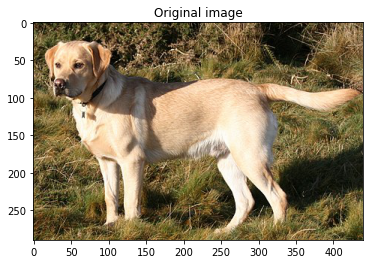

49152/35363 [=========================================] - 0s 0us/step


[[('n02099712', 'Labrador_retriever', 0.595044),
  ('n02099601', 'golden_retriever', 0.03446985),
  ('n02099849', 'Chesapeake_Bay_retriever', 0.016719341),
  ('n02108422', 'bull_mastiff', 0.016172744),
  ('n02105162', 'malinois', 0.009881907)]]

In [6]:
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/3/34/Labrador_on_Quantock_%282175262184%29.jpg/440px-Labrador_on_Quantock_%282175262184%29.jpg"
image = prepare_image2(url)

predictions = model.predict(image)

# Decode and print the predicted results.
from tensorflow.keras.applications import imagenet_utils
results = imagenet_utils.decode_predictions(predictions)

# Print the results.
results

## Problem 2:

1. **Split the CIFAR100 dataset into two datasets, each one containing 50 unique classes and train a model (model1) on the first dataset and another model (model2), one the second datasets.**
2. **Check the performance of each model.**

3. **Now use the first model (model1) as a pre-trained model to transfer learning to a new model (model3) that you will use to classify the second dataset.**

4. **Are your predictions on the second dataset using the pre-trained model (model3) improved compared to the predictions of model2?**

In [9]:
# Load the dataset.
from tensorflow.keras.datasets import cifar100

# Load the dataset.
(train_images100, train_labels100), (test_images100, test_labels100) = cifar100.load_data()

# The dataset contains 50000 images of 32 by 32 pixels of 3 channels.
# 60000 of them are used as train images.
train_images100 = train_images100.reshape((50000, 32, 32, 3))
train_images100 = train_images100.astype('float32') / 255

# 10000 of them are used as test images.
test_images100 = test_images100.reshape((10000, 32, 32, 3))
test_images100 = test_images100.astype('float32') / 255

from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot vector.
train_labels100 = to_categorical(train_labels100)
test_labels100  = to_categorical(test_labels100)

169017344/169001437 [==============================] - 2s 0us/step


In [10]:
boolarray = np.argmax(train_labels100, axis = 1) >= 50  # Seperating the images based on the labels

train1 = train_images100[boolarray] # applying the mask to the dataset
label1 = train_labels100[boolarray]

train2 = train_images100[~boolarray] # ~boolarray --> inverse of boolarray
label2 = train_labels100[~boolarray]

test_boolarray = np.argmax(test_labels100, axis = 1) >= 50  # repeat for test set

test1 = test_images100[test_boolarray] 
test_label1 = test_labels100[test_boolarray]

test2 = test_images100[~test_boolarray] 
test_label2 = test_labels100[~test_boolarray]

# No need to scale them, as they have been scaled previously

In [11]:
train1.shape, train2.shape , label1.shape,label2.shape

((25000, 32, 32, 3), (25000, 32, 32, 3), (25000, 100), (25000, 100))

In [12]:
test1.shape, test2.shape , test_label1.shape,test_label2.shape

((5000, 32, 32, 3), (5000, 32, 32, 3), (5000, 100), (5000, 100))

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout

model1 = Sequential()
model1.add(Conv2D( 16, kernel_size = (3, 3), strides = (1, 1), activation = 'relu', input_shape = (32, 32, 3), padding = "same"))
model1.add(MaxPooling2D(pool_size = (2, 2), strides = (1, 1), padding = 'valid'))
model1.add(Dropout(0.2))
model1.add(Conv2D( 32, kernel_size = (3, 3), strides = (1, 1), activation = 'relu', padding = 'valid'))
model1.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
model1.add(Dropout(0.25))
model1.add(Conv2D( 64, kernel_size = (3, 3), strides = (1, 1), activation = 'relu', padding = 'valid'))
model1.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
model1.add(Dropout(0.3))
model1.add(Conv2D( 64, kernel_size = (3, 3), strides = (1, 1), activation = 'relu', padding = 'valid'))
model1.add(Flatten())
model1.add(Dense(500, activation = 'relu'))
model1.add(Dropout(0.35))
model1.add(Dense(250, activation = 'relu'))
model1.add(Dense(100, activation = 'softmax'))

model1.summary()

model1.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

history1 = model1.fit(train1, label1,
                    validation_data = (test1, test_label1),
                    epochs = 20, batch_size = 32)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 16)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)        0

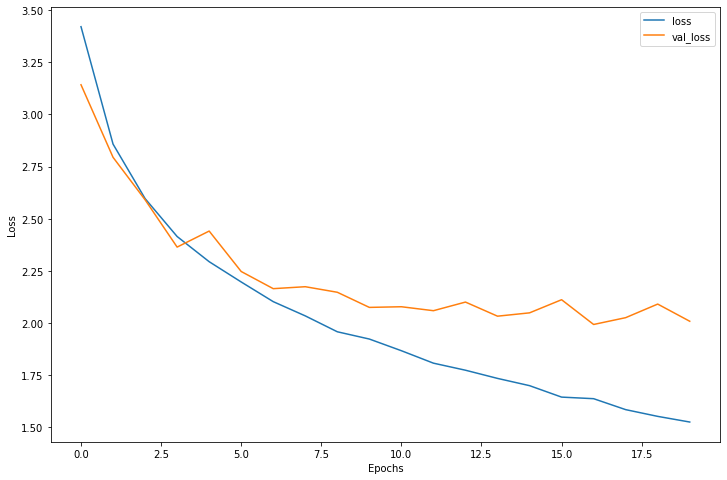

In [14]:
fig = plt.figure( figsize = (12,8) )

plt.plot( history1.history["loss"] , label = "loss")
plt.plot( history1.history["val_loss"], label = "val_loss")

plt.ylabel("Loss")
plt.xlabel("Epochs")

plt.legend()
plt.show()

In [15]:
model2 = Sequential()
model2.add(Conv2D( 16, kernel_size = (3, 3), strides = (1, 1), activation = 'relu', input_shape = (32, 32, 3), padding = "same"))
model2.add(MaxPooling2D(pool_size = (2, 2), strides = (1, 1), padding = 'valid'))
model2.add(Dropout(0.2))
model2.add(Conv2D( 32, kernel_size = (3, 3), strides = (1, 1), activation = 'relu', padding = 'valid'))
model2.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
model2.add(Dropout(0.25))
model2.add(Conv2D( 64, kernel_size = (3, 3), strides = (1, 1), activation = 'relu', padding = 'valid'))
model2.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
model2.add(Dropout(0.3))
model2.add(Conv2D( 64, kernel_size = (3, 3), strides = (1, 1), activation = 'relu', padding = 'valid'))
model2.add(Flatten())
model2.add(Dense(500, activation = 'relu'))
model2.add(Dropout(0.35))
model2.add(Dense(250, activation = 'relu'))
model2.add(Dense(100, activation = 'softmax'))

model2.summary()

model2.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

history2 = model2.fit(train2, label2,
                    validation_data = (test2, test_label2),
                    epochs = 20, batch_size = 32)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 16)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 31, 31, 16)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 14, 14, 32)       

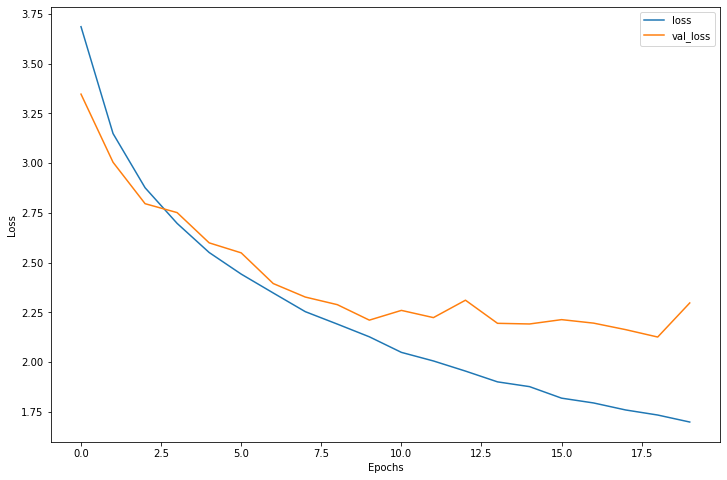

In [16]:
fig = plt.figure( figsize = (12,8) )

plt.plot( history2.history["loss"] , label = "loss")
plt.plot( history2.history["val_loss"], label = "val_loss")

plt.ylabel("Loss")
plt.xlabel("Epochs")

plt.legend()
plt.show()

In [17]:
model3 = Sequential()

for layer in model1.layers[:-4]:
  layer.trainable = False # DO NOT train these layers.
  model3.add(layer)

model3.add(Dense(500, activation = 'relu'))
model3.add(Dropout(0.35))
model3.add(Dense(250, activation = 'relu'))
model3.add(Dense(100, activation = 'softmax'))

model3.summary()

model3.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

history3 = model3.fit(train2, label2, 
                    validation_data = (test2, test_label2),
                    epochs = 20, batch_size = 32)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 16)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)       

In [18]:
model4 = Sequential()

for layer in model1.layers[:-4]:
  layer.trainable = True # DO train these layers.
  model4.add(layer) 
  
model4.add(Dense(500, activation = 'relu'))
model4.add(Dropout(0.35))
model4.add(Dense(250, activation = 'relu'))
model4.add(Dense(100, activation = 'softmax'))

model4.summary()

model4.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

history4 = model4.fit(train2, label2, 
                    validation_data = (test2, test_label2),
                    epochs = 20, batch_size = 32)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 16)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)       

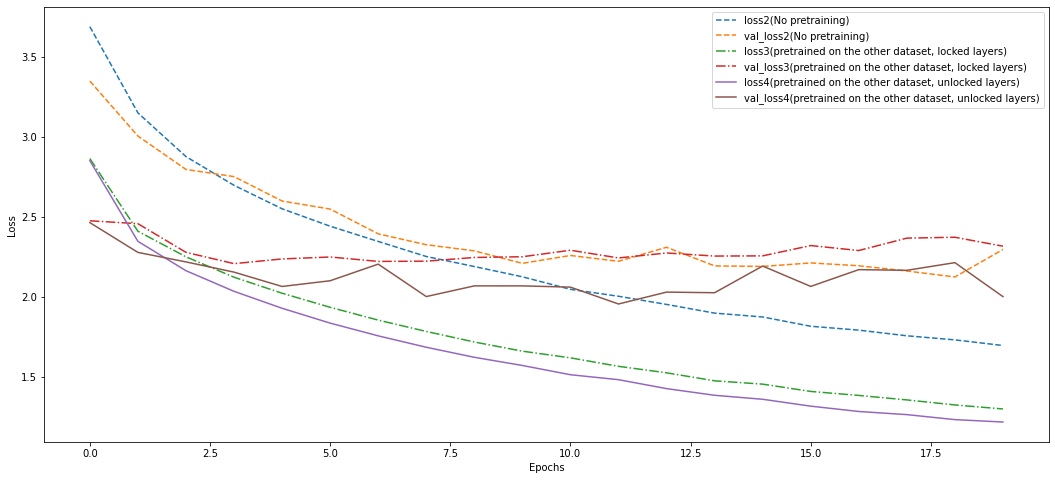

In [19]:
fig = plt.figure( figsize = (18,8) )

plt.plot( history2.history["loss"] ,'--', label = "loss2(No pretraining)")
plt.plot( history2.history["val_loss"],'--', label = "val_loss2(No pretraining)")

plt.plot( history3.history["loss"] ,'-.', label = "loss3(pretrained on the other dataset, locked layers)")
plt.plot( history3.history["val_loss"],'-.', label = "val_loss3(pretrained on the other dataset, locked layers)")

plt.plot( history4.history["loss"] ,'-', label = "loss4(pretrained on the other dataset, unlocked layers)")
plt.plot( history4.history["val_loss"],'-', label = "val_loss4(pretrained on the other dataset, unlocked layers)")

plt.ylabel("Loss")
plt.xlabel("Epochs")

plt.legend()
plt.show()

# Comments

We can see from the plot that the pretrained model that was not allowed to train the layers, gave a higher validation loss, compared to the original model. This is probably because it "inhereted" the overfitting of the original model. Meanwhile, the model that was allowed to train its layers achieved a lower validation loss, compared with the original model.